### judge how many topics appeared before

In [16]:
def countTopics(df):
    # 仅需讨论何时出现与之前相同的单词

    topicCnt = len(df)

    singleTopicIdxDt = {}

    # topic same with before list
    topicSWBList = [0] * topicCnt

    """
        input demo: 0_storage_method_device_system
    """
    def fetchTopTopicName(topicName):
        return topicName.split('_')[1:]

    for idx, row in df.iterrows():
        topicNames = fetchTopTopicName(row['Name'])
        cnt = 0
        for tn in topicNames:
            if singleTopicIdxDt.__contains__(tn):
                cnt += 1
            else:
                singleTopicIdxDt[tn] = idx
        
        topicSWBList[idx] = cnt
        
    return topicSWBList

#### statistic for one certain topic file

In [3]:
_0_4RatioList = []
topicSWBList = countTopics(df)
topicCnt = len(topicSWBList)

# mt: more than
# _0_4RatioList[j][i]: at topic j, the ratio of latter topics which have more than i topic items same with before
# _0_4RatioList[j][3] = count(topicSWBList[k] > 3 for k in [j, topicCnt)) / (topicCnt - j)
 
# mt0, mt1, mt2, mt3 = 0, 0, 0, 0
mtList = [0, 0, 0, 0]
addList = [[0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1]]

for i in range(topicCnt - 1, -1, -1):

    cnt = topicSWBList[i]
    
    mtList = [mtList[i] + addList[cnt][i] for i in range(4)]
    _0_4RatioList.append([k / (topicCnt - i) for k in mtList])

_0_4_Order_RatioList = []
for i in range(topicCnt - 1, -1, -1):
    _0_4_Order_RatioList.append(_0_4RatioList[i])

_0_4_Order_RatioList = _0_4RatioList

dfCnt = pd.Series(topicSWBList, name='appBefore')
dfRatio = pd.DataFrame(_0_4_Order_RatioList, columns=['MT0', 'MT1', 'MT2', 'MT3'])
df0 = pd.concat([df, dfCnt, dfRatio], axis=1)

df0.to_csv(f'{resDir}/topicWithApp.csv', index=False)

#### statistic for all files generate

In [18]:
import pandas as pd
import os

authorType = 'All'
workDir = f'./topic{authorNum}/version'
resDir = f'./results'

for field in ['visualization']:
    infoList = []
    for dir in os.listdir(workDir):
        srcDir = f'{workDir}/{dir}/output/{field}'
        if not os.path.exists(srcDir):
            continue
        df0 = pd.read_csv(f'{srcDir}/topic_count_name.csv')
        topicSWBList = countTopics(df0)
        topicCnt = len(topicSWBList)
        mtList = [0, 0, 0, 0]
        addList = [[0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1]]

        for i in range(topicCnt):
            cnt = topicSWBList[i]
            mtList = [mtList[i] + addList[cnt][i] for i in range(4)]

        mtList = [mtList[i] / topicCnt for i in range(4)]
        top3Counts = list(df0.Count.values[:3])
        infoList.append(mtList + top3Counts + [topicCnt, dir])

        with open(f'./results/{field}{authorType}Results.txt', 'a+') as f:
            f.write(f'{srcDir}\n')
        
            for i in mtList + top3Counts + [topicCnt]:
                f.write(f'{i} ')
            
            f.write('\n')

    df = pd.DataFrame(infoList, columns=['MT0', 'MT1', 'MT2', 'MT3', 'topic0Count', 'topic1Count', 'topic2Count', 'topicCnt', 'dir'])
    df.to_csv(f'{resDir}/{field}{authorType}Resutls.csv', index=False)

In [7]:
l = range(topicCnt)
l.__class__, l

(list, [range(0, 230)])

### get paperID title abstract csv from papers

In [13]:
import pandas as pd
import os

resDir = './topicTop/src'
fieldMidDt = {'visualization': 'VIS', 'database': 'DB', 'CG': 'CG', 'fellow': 'FEL'}

for field in ['visualization']:
    df = None
    srcDir = f'./topicTop/input/{field}'

    columns = ['paperID', 'title', 'abstract', 'year']

    for fn in os.listdir(srcDir):
        df0 = pd.read_csv(f'{srcDir}/{fn}')
        # if keyID in set(str(k) for k in df0.paperID.values):
        #     print(fn)
        #     print(len(df0), 0 if df is None else len(df))
        df0 = df0[columns]
        df0.fillna('', inplace=True)
        
        if df is None:
            df = df0
        else:
            df = pd.concat([df, df0])

    # df.fillna('', inplace=True)
    print(len(df))

    dfSingle = df.drop_duplicates(subset=['paperID'], keep='first')
    print(len(dfSingle))  
    

    dfSingle.to_csv(f'{resDir}/papers{fieldMidDt[field]}Top.csv', index=False)
    

137832
80017


In [14]:
dfSingle.fillna('', inplace=True)
len(dfSingle[dfSingle['abstract'] == ''])

/tmp/ipykernel_372236/2435616785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSingle.fillna('', inplace=True)


14609

In [11]:
dfSingle

,paperID,title,abstract,year
0,111991172,Temporal and video constraint databases,"This dissertation proposes a general, flexible...",2000.0
1,13101404,Moving Objects Databases,Each moving objects database represents the tr...,2010.0
2,1486518722,Model-Theoretic Minimal Chenge Operators for C...,Database systems should allow users to insert ...,1997.0
3,1498119955,A Closed Form for Datalog Queries with Integer...,The use of constraints within logic programmin...,1990.0
4,1507692784,DOAS: a drought online analysis system with co...,The Standardized Precipitation Index (SPI) [5]...,2004.0
...,...,...,...,...
9,2936285431,Political Discussions in Homogeneous and Cross...,"Online platforms, such as Facebook, Twitter, a...",2019.0
11,2962830985,What Gets Media Attention and How Media Attent...,,2017.0
12,2963132053,Political Discussions in Homogeneous and Cross...,"Online platforms, such as Facebook, Twitter, a...",2019.0
13,2963185664,Two Tales of the World: Comparison of Widely U...,"In this work, we compare GDELT and Event Regis...",2016.0


In [11]:
import pandas as pd

df = pd.read_csv('./topicTop/src/papersDBTop.csv')
df.fillna(-1, inplace=True)

len(df), len(df[df['abstract'] == -1])

(131343, 16625)

In [3]:
import pandas as pd

df = pd.read_csv('./topicAll/src/papersInfoAll.csv')
df.fillna(-1, inplace=True)

len(df), len(df[df['abstract'] == -1])

(1155962, 394859)

In [12]:
import pandas as pd

df = pd.read_csv('./topicTop/src/papersCGTop.csv')
df.fillna(-1, inplace=True)

len(df), len(df[df['abstract'] == -1])



(77310, 11822)

In [5]:
import pandas as pd
import os

srcDir = './topic/input/database'
resDir = './topic/src'

df1 = None

columns = ['paperID', 'title', 'abstract']

for fn in os.listdir(srcDir):
    df0 = pd.read_csv(f'{srcDir}/{fn}')
    df0 = df0[columns]
    if df1 is None:
        df1 = df0
    else:
        df1 = pd.concat([df1, df0])

df1.fillna('', inplace=True)
print(len(df1))

dfSingle1 = df1.drop_duplicates(subset=['paperID'], keep='first')
print(len(dfSingle1))  

254938
157334


### delete '\n' in abstract

In [29]:
import pandas as pd
import os

srcDir = './topicVCG/input/VCG'
resDir = './topicVCG/input/VCGNew'

for fn in os.listdir(srcDir):
    df = pd.read_csv(f'{srcDir}/{fn}')
    df.fillna('', inplace=True)
    df['abstract'] = df['abstract'].apply(lambda x : x.replace('\n', ' '))
    df.to_csv(f'{resDir}/{fn}', index=False)

In [32]:
len(os.listdir(srcDir)), len(os.listdir(resDir))

(6109, 6109)

In [6]:
from random import shuffle

teams = ['A', 'A', 'A', 'B', 'C', 'D', 'E', 'F']
times = 10000000
cnt = 0

for i in range(times):
    shuffle(teams)
    for j in range(4):
        if teams[2 * j] == teams[2 * j + 1]:
            cnt += 1
            break

cnt / times

0.4282074

### test BERTopic's approximate distribution

In [9]:
import torch
torch.cuda.is_available()

True

In [6]:
import pandas as pd
from bertopic import BERTopic

workDir = './topicTop'
field = 'CG'

df = pd.read_csv(f'{workDir}/src/papers{field}Top.csv')
df.fillna('', inplace=True)
    
df['documents'] = (df['title'] + '. ') * 3 +  df['abstract']
paperKey = df.paperID.tolist()
docs = df.documents.tolist()

topic_model = BERTopic.load(f'{workDir}/model/{field}_model')

In [7]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,31547,-1_image_method_data_based
1,0,9747,0_graphics_visualization_proceedings_computer
2,1,3094,1_display_device_screen_touch
3,2,2043,2_image_camera_processing_photographing
4,3,1785,3_visualization_visual_data_analysis
...,...,...,...
68,67,121,67_visibility_culling_occlusion_occluders
69,68,120,68_shading_phong_relief_normals
70,69,110,69_plenoptic_camera_focused_cameras
71,70,102,70_subdivision_schemes_scheme_extraordinary


In [8]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)


100%|██████████| 78/78 [01:50<00:00,  1.42s/it]


In [14]:
import numpy as np

maxIdxList = [arr.argsort()[-4:] for arr in topic_distr]
maxProbList = [arr.sort()[-4] for arr in topic_distr]

len(maxIdxList)

77310

In [23]:
doc_info = topic_model.get_document_info(docs)
doc_topic_info = list(doc_info["Topic"].values)

for i in range(len(maxIdxList)):
    if doc_topic_info[i] != maxIdxList[i][1] and doc_topic_info[i] != -1:
        print(i, doc_topic_info[i], maxIdxList[i][1])
        break

7 41 36


In [28]:
topic_distr[7]

array([0.        , 0.03226806, 0.07398971, 0.        , 0.        ,
       0.13588537, 0.01178469, 0.        , 0.        , 0.        ,
       0.        , 0.00726709, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07467349, 0.        , 0.03827896, 0.        ,
       0.01925361, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0686642 ,
       0.        , 0.23428091, 0.        , 0.        , 0.        ,
       0.        , 0.22286175, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0059487 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00715413, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00540053, 0.0622888 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

### try N-grams of CountVectorizer

In [38]:
#coding=utf-8
'''
Created on 2018-1-25

'''

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
df = pd.read_csv('../CitationAnalysis/src/originFiles/visDataPapers.csv')
df.fillna('', inplace=True)
df = df[df['abstract'] != '']
df.reset_index(drop=True, inplace=True)
text = [s.lower() for s in (df.abstract.to_list())]

text = ["A smile is the most charming part of a person forever.","A smile is"]

# ngram_range=(2, 2)表明适应2-gram,decode_error="ignore"忽略异常字符,token_pattern按照单词切割
# ngram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))

x1 = ngram_vectorizer.fit_transform(text)
print(x1)
# (0, 7)    1
# (0, 0)    1
# (0, 5)    1
# (0, 6)    1
# (0, 2)    1
# (0, 4)    1
# (0, 9)    1
# (0, 3)    1
# (0, 8)    1
# (0, 1)    1
# (1, 8)    1
# (1, 1)    1


  (0, 13)	1
  (0, 3)	1
  (0, 15)	1
  (0, 5)	1
  (0, 0)	1
  (0, 9)	1
  (0, 7)	1
  (0, 11)	1
  (0, 2)	1
  (0, 14)	1
  (0, 4)	1
  (0, 16)	1
  (0, 6)	1
  (0, 1)	1
  (0, 10)	1
  (0, 8)	1
  (0, 12)	1
  (1, 13)	1
  (1, 3)	1
  (1, 14)	1


In [39]:
print(x1.toarray())
# [[1 1 1 1 1 1 1 1 1 1]
#  [0 1 0 0 0 0 0 0 1 0]]
# 查看生成的词表
print(ngram_vectorizer.vocabulary_)
# {u'person forever': 7, u'part of': 6, u'smile is': 8, u'a smile': 1, u'of a': 5, u'the most': 9, u'is the': 3, u'charming part': 2, u'a person': 0, u'most charming': 4}

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0]]
{'smile': 13, 'is': 3, 'the': 15, 'most': 5, 'charming': 0, 'part': 9, 'of': 7, 'person': 11, 'forever': 2, 'smile is': 14, 'is the': 4, 'the most': 16, 'most charming': 6, 'charming part': 1, 'part of': 10, 'of person': 8, 'person forever': 12}


In [13]:
with open('./results/tmp1.txt') as f:
    citSet1 = set(s.strip()[4:] for s in f.readlines())
len(citSet1)

38

In [6]:
import numpy as np

arr = np.array([1, 2, 2, 3, 1, 1])
np.argsort(-arr)

array([3, 1, 2, 0, 4, 5])

In [7]:
import pandas as pd 

df = pd.read_csv('./topicTop/src/papersVISTop.csv')
print(len(df))
df.fillna('', inplace=True)
len(df[df['abstract'] == ''])

317802


68824

In [8]:
import pandas as pd 

df = pd.read_csv('./topicAll/src/papersVISAll.csv')
print(len(df))
df.fillna('', inplace=True)
len(df[df['abstract'] == ''])

80017


42275

### statistic for the common words ratio automatic learned using bertopic with TOP & ALL authors

**especially top10 words**

do not statistic for stemming words yet

In [28]:
import os
import pandas as pd


authorTypeList = ['All', 'Top']
# authorType = 'Top'
# fieldList = ['visualization']
field = 'visualization'

# top 8 words, top Half words, allWords
def fetchTopicWordsFromCSV(filename):
    df = pd.read_csv(filename)
    
    def fetchWords(topicName):
        return topicName.split('_')[1:]
    
    def findTopics(dfTmp):
        topics = set()
        for topicName in dfTmp.Name.values:
            topicList = fetchWords(topicName)
            for tn in topicList:
                topics.add(tn)
    
        
        return topics

    allTopics = findTopics(df)
    topTopics = findTopics(df[:8])
    halfTopics = findTopics(df[:len(df)//2])

    return allTopics, topTopics, halfTopics

midDir = '23-12-07_22:02:17'

srcDir = f'./topic{authorType}/version/{midDir}/output/{field}'
filename = f'{srcDir}/topic_count_name.csv'

at, tt, ht = fetchTopicWordsFromCSV(filename)

dirIndexDt = {}
dirNameList = []
idx = 0
allTopicsList = []
topTopicsList = []
halfTopicsList = []

for authorType in authorTypeList:
    workDir = f'./topic{authorType}/version'
    for midDir in os.listdir(workDir):
        srcDir = f'{workDir}/{midDir}/output/{field}'
        if not os.path.exists(srcDir):
            continue
        filename = f'{srcDir}/topic_count_name.csv'
        
        at, tt, ht = fetchTopicWordsFromCSV(filename)
        
        allTopicsList.append(at)
        topTopicsList.append(tt)
        halfTopicsList.append(ht)
        
        dirName = f'{authorType}_{midDir}'
        
        dirIndexDt[dirName] = idx
        dirNameList.append(dirName)
        idx += 1

In [29]:
import numpy as np

def calSimilarity(setBase, setCmp):
    return len(setBase & setCmp) / len(setBase)

def calSimilarityList(setBase, setList):
    return [calSimilarity(setBase, setCmp) for setCmp in setList]

def calSelfConfusionMatrix(setList):
    return np.array([calSimilarityList(setBase, setList) for setBase in setList])

allTopicsMatrix = calSelfConfusionMatrix(allTopicsList)
topTopicsMatrix = calSelfConfusionMatrix(topTopicsList)
halfTopicsMatrix = calSelfConfusionMatrix(halfTopicsList)


In [30]:
df = pd.DataFrame(allTopicsMatrix, columns=dirNameList, index=dirNameList)
df.to_csv(f'./results/{field}AllTopicsMatrix.csv')
df = pd.DataFrame(topTopicsMatrix, columns=dirNameList, index=dirNameList)
df.to_csv(f'./results/{field}TopTopicsMatrix.csv')
df = pd.DataFrame(halfTopicsMatrix, columns=dirNameList, index=dirNameList)
df.to_csv(f'./results/{field}HalfTopicsMatrix.csv')

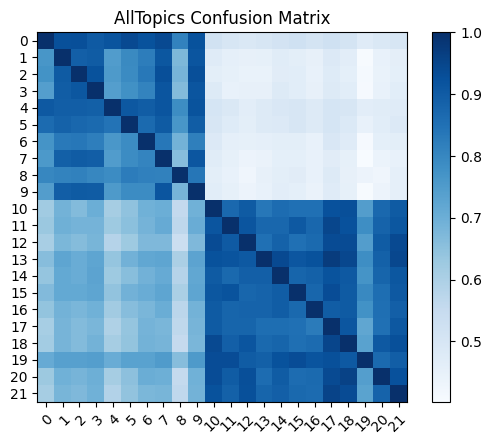

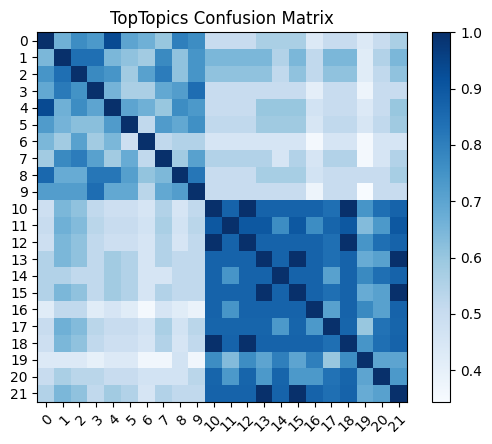

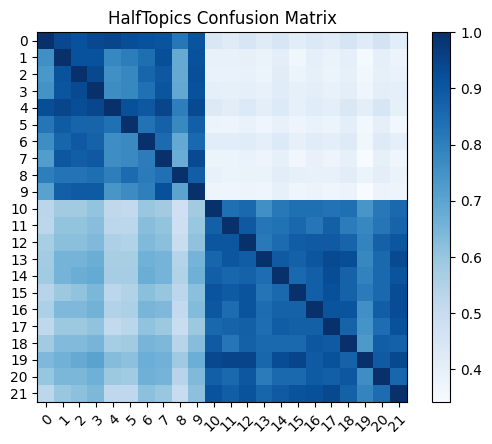

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(confusion_matrix, labels, figname):
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set ticks and labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    # for i in range(len(labels)):
    #     for j in range(len(labels)):
    #         text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="w")

    # Set title and labels
    ax.set_title(f"{figname} Confusion Matrix")
    # ax.set_xlabel("Predicted")
    # ax.set_ylabel("Actual")

    # Save plot with high resolution
    plt.savefig(f"./results/{field}{figname}.png", dpi=300)

    # Show plot
    plt.show()

# Example usage
# confusion_matrix = np.array([[10, 2, 3], [1, 12, 4], [5, 6, 15]])
# labels = ['Class 1', 'Class 2', 'Class 3']
labels = [f'{i}' for i in range(len(dirNameList))]
plot_confusion_matrix(allTopicsMatrix, labels, 'AllTopics')
plot_confusion_matrix(topTopicsMatrix, labels, 'TopTopics')
plot_confusion_matrix(halfTopicsMatrix, labels, 'HalfTopics')



In [27]:
dirNameList[10]

'All_23-11-16_19:09:36'

In [1]:
import os

fieldDir = '/home/sy/MAGProcessing/create_field/out'
for midDir in os.listdir(fieldDir):
    if os.path.isdir(f'{fieldDir}/{midDir}'):
        print(midDir)

physics
fellow
AI0
CN
HCI
SE
AI2
visualization
database
CG
AI1
scigene_acl_anthology
vis
VCG


In [6]:
import os
import paramiko

def execute_command_as_root(ssh, command, sudo_password):
    """ Execute a single command as root using sudo and the provided password """
    command = f"sudo -S -p '' {command}"
    stdin, stdout, stderr = ssh.exec_command(command)
    stdin.write(sudo_password + "\n")
    stdin.flush()
    return stdout.readlines(), stderr.readlines()

def upload_file_as_root(srcfield, targetField):
    server = '82.156.152.182'
    port = 22
    username = 'xl'
    password = 'QWer!@34'
    sudo_password = 'QWer!@34'
    
    ssh = paramiko.SSHClient()
    ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
    ssh.connect(server, port, username, password)

    # Create directory as root if needed
    srcBaseDir = f'./topicAutoSimple/output/{srcfield}'
    tarBaseDir = f'/home/xfl/pyCode/GFVisTest/csv/{targetField}'
    
    stdout, stderr = execute_command_as_root(ssh, f"mkdir -p {tarBaseDir}", sudo_password)
    if stderr:
        print("Error in creating directory:", stderr)
        return

    files = ['paperID2topic.json', 'field_leaves.csv', 'field_roots.csv'] 
    
    for file in files:
        sftp = ssh.open_sftp()
        
        # Temporarily upload file to a user-writable location
        tmpName = f"/tmp/{file}"
        sftp.put(f'{srcBaseDir}/{file}', tmpName)
        sftp.close()

        # Move file to the final location as root
        _, stderr = execute_command_as_root(ssh, f"mv {tmpName} {tarBaseDir}/{file}", sudo_password)
        if stderr:
            print("Error in moving file:", stderr)

    ssh.close()

In [8]:
upload_file_as_root('fellowTuring500', 'fellowTuring500')

In [1]:
import shutil
shutil.copytree('./topicAutoSimple/output/AIBackup1', './topicAutoSimple/version/output/AIBackup1-tmp')

'./topicAutoSimple/version/output/AIBackup1-tmp'

In [60]:
import shutil
import os

workDir = './topicTop'

def saveMidFile(field):
    dirs = ['output', 'model']
    
    for tarDir in dirs:
        if os.path.exists(f'{workDir}/version/{tarDir}/{field}'):
            shutil.rmtree(f'{workDir}/version/{tarDir}/{field}')
            
        os.makedirs(f'{workDir}/version/{tarDir}', exist_ok=True)
        shutil.move(f'{workDir}/{tarDir}/{field}', f'{workDir}/version/{tarDir}')

def loadResFile(field):
    dirs = ['output', 'model']
    # dirs = [f'{d}/{field}' for d in ['output', 'model']]
    for tarDir in dirs:
        shutil.move(f'{workDir}/version/{tarDir}/{field}', f'{workDir}/{tarDir}')


def removeMidFile(field):
    dirs = [f'{d}/{field}' for d in ['output', 'model']]
    for tarDir in dirs:
        shutil.rmtree(f'{workDir}/{tarDir}')
        

In [65]:
loadResFile('database')

In [68]:
import os

len(os.listdir('./topicTop/input/CG'))

6744

In [18]:
from bertopic import BERTopic
import pandas as pd

field = 'CG'
workDir = './topicTop'
dfOrigin = pd.read_csv(f'{workDir}/src/papers{field}Top.csv')
df = dfOrigin.dropna()
df.reset_index(drop=True, inplace=True)
df['documents'] = df['title'] + '. ' + df['title'] + '. ' + df['title'] + '. ' + df['abstract']
paperKey = df.paperID.tolist()
docs = df.documents.tolist()

df.to_csv(f'{workDir}/src/papers{field}TopHasAb.csv', index=False)

In [19]:
topic_model = BERTopic.load(f'{workDir}/model/{field}_model')
topic_distr, _ = topic_model.approximate_distribution(docs, calculate_tokens=False)


100%|██████████| 66/66 [01:06<00:00,  1.00s/it]


In [23]:
len(topic_model.get_topic_info())

77

In [25]:
columns = [f'_{i}' for i in range(len(topic_distr[0]))]

In [27]:
dfTmp = pd.DataFrame(topic_distr, columns=columns)
dfTmp.to_csv(f'{workDir}/src/papers{field}TopTopicDistr.csv', index=False)

In [28]:
dfTmp['paperID'] = paperKey
dfTmp = dfTmp[['paperID'] + columns]
dfTmp.to_csv(f'{workDir}/src/papers{field}TopTopicDistr.csv', index=False)


In [13]:
import pandas as pd
import random

mat = []
for i in range(50):
    ll = [random.randint(1, 10) for j in range(10)]
    mat.append(ll)

df = pd.DataFrame(mat, columns=[f'_{i}' for i in range(10)])
df1 = df.groupby('_0').size()
df0 = df.groupby('_0').sample(n=3, replace=True)

df1

_0
1     5
2     5
3     3
4     2
5     5
6     9
7     5
8     9
9     4
10    3
dtype: int64

In [14]:
df0

,_0,_1,_2,_3,_4,_5,_6,_7,_8,_9
24,1,3,5,6,3,4,5,8,5,5
49,1,8,7,6,5,9,10,3,4,4
11,1,6,6,4,5,7,2,5,10,8
46,2,5,6,9,7,10,3,5,8,10
21,2,4,10,5,1,7,1,10,9,5
26,2,8,8,8,7,6,10,8,3,10
14,3,1,8,5,6,1,7,10,8,6
14,3,1,8,5,6,1,7,10,8,6
47,3,6,1,1,3,4,6,4,2,5
22,4,8,3,9,4,6,2,2,7,7


In [21]:
import numpy as np

base_topics = np.array([i for i in range(10)])
topics = base_topics.copy().reshape(-1, 1)
mappings_ = np.hstack([topics.copy(), topics.copy()]).tolist()
mappings_

[[0, 0],
 [1, 1],
 [2, 2],
 [3, 3],
 [4, 4],
 [5, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [9, 9]]

In [23]:
mappings = np.array(mappings_)[:, [0, -1]]
mappings = dict(zip(mappings[:, 0], mappings[:, 1]))

mappings

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

In [23]:
import numpy as np 

x1 = np.array([1, 1, 2])
x2 = np.array([2, 2, 2])
x4 = np.array([1, 2, 4])

x3 = np.array([x1, x2, x4])

np.linalg.norm(x3 - x1, axis=1)

array([0.        , 1.41421356, 2.23606798])

In [27]:
from scipy.spatial import distance
def mahalanobis_distance(vector, vectors, cov_inv):
    """
    Calculate the Mahalanobis distance between a vector and a group of vectors.
    
    Parameters:
    vector : array_like
        The vector for which distances are to be calculated.
    vectors : array_like
        An array of vectors to which distances are to be calculated.
    cov_inv : array_like
        The inverse covariance matrix of the vectors.
        
    Returns:
    array_like
        An array of Mahalanobis distances between the vector and each vector in vectors.
    """
    # Calculate the Mahalanobis distance between the vector and each vector in vectors
    distances = []
    for v in vectors:
        diff = v - vector
        distances.append(distance.mahalanobis(diff, np.zeros_like(diff), cov_inv))
    return distances

In [29]:

cov_matrix = np.cov(x3.T)  # Calculate covariance matrix
cov_inv = np.linalg.inv(cov_matrix)
distances = mahalanobis_distance(x1, x3, cov_inv)
x3, cov_matrix, distances
# distances
# distances
# cov_inv

(array([[1, 1, 2],
        [2, 2, 2],
        [1, 2, 4]]),
 array([[ 0.33333333,  0.16666667, -0.33333333],
        [ 0.16666667,  0.33333333,  0.33333333],
        [-0.33333333,  0.33333333,  1.33333333]]),
 [0.0, 2.8284271247461903, 2.0])

In [19]:
import pandas as pd
import numpy as np

def fetchArray(df):
    df.fillna(0, inplace=True)
    docSim = []
    for _, row in df.iterrows():
        docSim.append(row.values.tolist()[1:])
    
    return np.asarray(docSim)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

topNum = 5
def saveFig(data, title, outpath, isSimilarity=False, myTopNum = None, xlabel='Similarity'):
    thisTopNum = myTopNum or topNum
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    for i in range(thisTopNum - 1, -1, -1):
        sns.kdeplot(data[:, i], color=colors[i], fill=False, label=f'top_{thisTopNum - i}')
    if isSimilarity:
        plt.xticks(np.arange(0, 1, 0.05))
    # else:
        # plt.yscale('log')
        # plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=0.4)) # Adjust the base value as needed

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.savefig(outpath)
    plt.close()
    print(f'save fig {outpath}')

In [13]:
field = 'fellowVSNon'
suffix = '-tc100'
dirMid = f'{field}{suffix}'
outDir = f'./topicAutoSimple/output/{dirMid}'

# dfSim = pd.read_csv(f'{outDir}/paperIDEuDisDist.csv')
dfSim = pd.read_csv(f'{outDir}/paperIDMHDisDist.csv')
docSim = fetchArray(dfSim)
dfDoc = pd.read_csv(f'{outDir}/docInfo.csv')
originTopics = dfDoc['Topic'].values

In [14]:
originDf = pd.read_csv(f'./topicAutoSimple/src/papers_{field}_autoTop.csv')
paperKey = originDf.dropna(subset=['abstract']).paperID.tolist()
dfDoc['paperID'] = paperKey
dfPosPaperIDSet = set(dfDoc[dfDoc['Topic'] != -1]['paperID'].tolist())
dfNegPaperIDSet = set(dfDoc[dfDoc['Topic'] == -1]['paperID'].tolist())
df = originDf.dropna(subset=['abstract'])
hasAbPaperID = set(df.paperID.tolist())
hasAbIndices = df.index.tolist()

hasAbPosIndices = originDf[originDf['paperID'].isin(dfPosPaperIDSet)].index.tolist()
hasAbNegIndices = originDf[originDf['paperID'].isin(dfNegPaperIDSet)].index.tolist()

noAbDf = originDf[~originDf['paperID'].isin(hasAbPaperID)]
noAbIndices = noAbDf.index.tolist()
sortedSim = np.sort(docSim, axis=1)[:,::-1]

In [15]:
sortedSim

array([[32.77358301, 32.46990078, 31.09563501, ..., 22.86519619,
        22.71987953, 21.46126231],
       [31.22636204, 29.86155391, 29.68190527, ..., 19.39770712,
        18.91615544, 18.80166066],
       [36.40410738, 34.57243759, 34.38578616, ..., 26.3411668 ,
        26.26392626, 25.70452977],
       ...,
       [28.28046651, 27.58910596, 26.55710651, ..., 15.20568317,
        15.14981695, 15.03430246],
       [31.01929855, 29.45965093, 27.87680294, ..., 18.74558219,
        18.67391426, 18.43692221],
       [33.15013677, 32.65436943, 31.43377427, ..., 22.71645151,
        22.48314293, 22.20881344]])

In [16]:
np.max(sortedSim), np.min(sortedSim)

(64.45968262206075, 10.138378574637876)

In [12]:
l2 = np.max(sortedSim, axis=1)
l1 = l2[l2 < 1]
len(l1)

394860

In [17]:
import os
topNum = 5
def saveFigs(sortedSim, suffix, isSimilarity=False, xlabel='Similarity', xAbbr='Sim', partHaveAb=True):
    topSim = sortedSim[:, -topNum:]
    if partHaveAb:
        topSimHasAb = topSim[hasAbIndices]
        topSimNoAb = topSim[noAbIndices]
    topSimHasAbPos = topSim[hasAbPosIndices]
    topSimHasAbNeg = topSim[hasAbNegIndices]
        
    figOutDir = f'{outDir}/fig{suffix}'
    os.makedirs(figOutDir, exist_ok=True)
    saveFig(topSim, f'Top {topNum} {xlabel} Distribution {suffix}', f'{figOutDir}/top{topNum}{xAbbr}Dist.png', isSimilarity=isSimilarity, xlabel=xlabel)
    if partHaveAb:
        saveFig(topSimHasAb, f'Top {topNum} {xlabel} Distribution (Has Abstract) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistHasAb.png', isSimilarity=isSimilarity, xlabel=xlabel)
        saveFig(topSimNoAb, f'Top {topNum} {xlabel} Distribution (No Abstract) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistNoAb.png', isSimilarity=isSimilarity, xlabel=xlabel)
    saveFig(topSimHasAbPos, f'Top {topNum} {xlabel} Distribution (Has Abstract & Positive) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistHasAbPos.png', isSimilarity=isSimilarity, xlabel=xlabel)
    saveFig(topSimHasAbNeg, f'Top {topNum} {xlabel} Distribution (Has Abstract & Negative) {suffix}', f'{figOutDir}/top{topNum}{xAbbr}DistHasAbNeg.png', isSimilarity=isSimilarity, xlabel=xlabel)

In [20]:
# saveFigs(sortedSim, '', isSimilarity=False, xlabel='Distance', xAbbr='Dis')
saveFigs(sortedSim, '', isSimilarity=False, xlabel='Distance', xAbbr='MHDis')

save fig ./topicAutoSimple/output/fellowVSNon-tc100/fig/top5MHDisDist.png
save fig ./topicAutoSimple/output/fellowVSNon-tc100/fig/top5MHDisDistHasAb.png
save fig ./topicAutoSimple/output/fellowVSNon-tc100/fig/top5MHDisDistNoAb.png
save fig ./topicAutoSimple/output/fellowVSNon-tc100/fig/top5MHDisDistHasAbPos.png
save fig ./topicAutoSimple/output/fellowVSNon-tc100/fig/top5MHDisDistHasAbNeg.png
